## ICD11-Trees

In [89]:
import networkx as nx
import json as json
import seaborn as sns
sns.set()

In [90]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

---------------

### Get Data

In [91]:
with open('1639304259.json', 'r')as f:
    data = json.load(f)

### Simple Graph

In [116]:
G = nx.Graph()

In [117]:
for item in data[0:200]:
    item_id = item['id']
    G.add_node(item_id,\
               title=item['title'],\
               defn = item['defn'])
    
    childs = item['childs']
    if childs!= 'Key Not found':
        for c_id in childs:
            G.add_edge(item_id,c_id, object = 'child')

In [118]:
G.number_of_nodes(),G.number_of_edges()

(231, 234)

##### Plot the Graph

In [119]:
import matplotlib.pyplot as plt

##### Normal

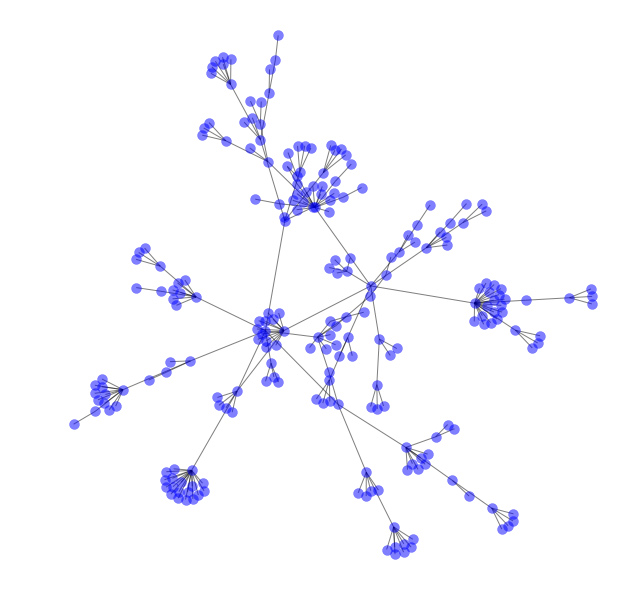

In [120]:
plt.figure(figsize = [8,8])
pos = nx.spring_layout(G)
nx.draw(G,pos, 
        with_labels=False, 
        font_weight='bold',
        font_size = 20,
        node_size=100,
        node_color='blue',
        alpha = 0.5)
plt.show()

##### Advanced

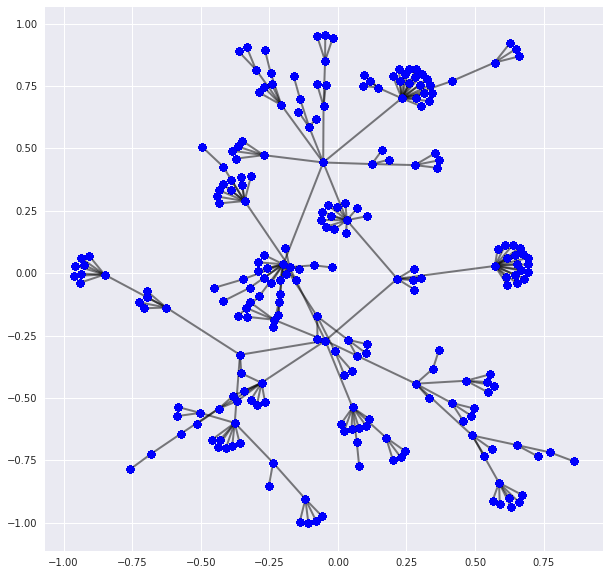

In [125]:
plt.figure(figsize = [10,10])

pos = nx.spring_layout(G)  # positions for all nodes


for node in G.nodes():
    nx.draw_networkx_nodes(G,pos,
                       node_color='blue',
                       node_size=50,
                       alpha=0.4)
for edge in G.edges():
    nx.draw_networkx_edges(G,pos,
                       edgelist=[edge],
                       width=2, alpha=0.5, edge_color='black')
plt.show()

--------------

### Digraph

In [102]:
DG =nx.DiGraph()
for item in data[0:100]:
    item_id = item['id']
    DG.add_node(item_id,\
               title=item['title'],\
               defn = item['defn'])
    
    childs = item['childs']
    if childs!= 'Key Not found':
        for c_id in childs:
            DG.add_edge(item_id,c_id, relation = "child")
            
    parents = item['parents']
    if parents!= 'Key Not found':
        for p_id in parents:
            DG.add_edge(p_id,item_id,relation = "parent")

--------------

##### Simple PLot

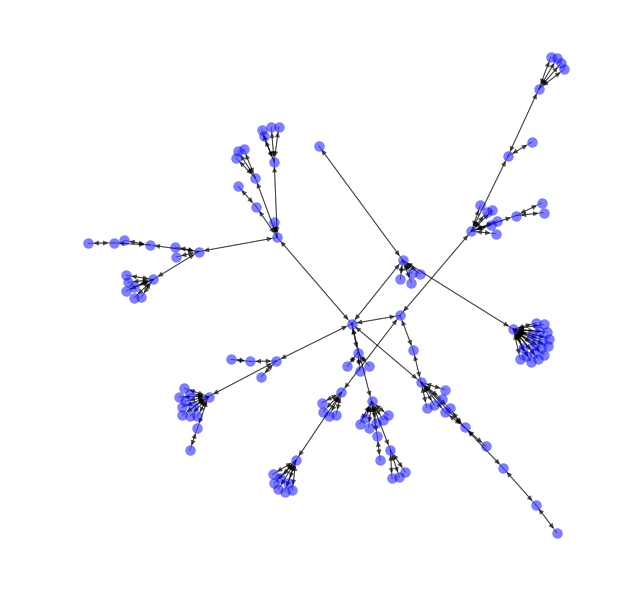

In [108]:
plt.figure(figsize = [8,8])
pos = nx.spring_layout(G)

nx.draw(DG,pos,
        with_labels=False, 
        font_weight='bold',
        font_size = 10,
        node_size=100,
        node_color='blue',
        alpha = 0.5)
plt.show()

#####  Advanced Plot

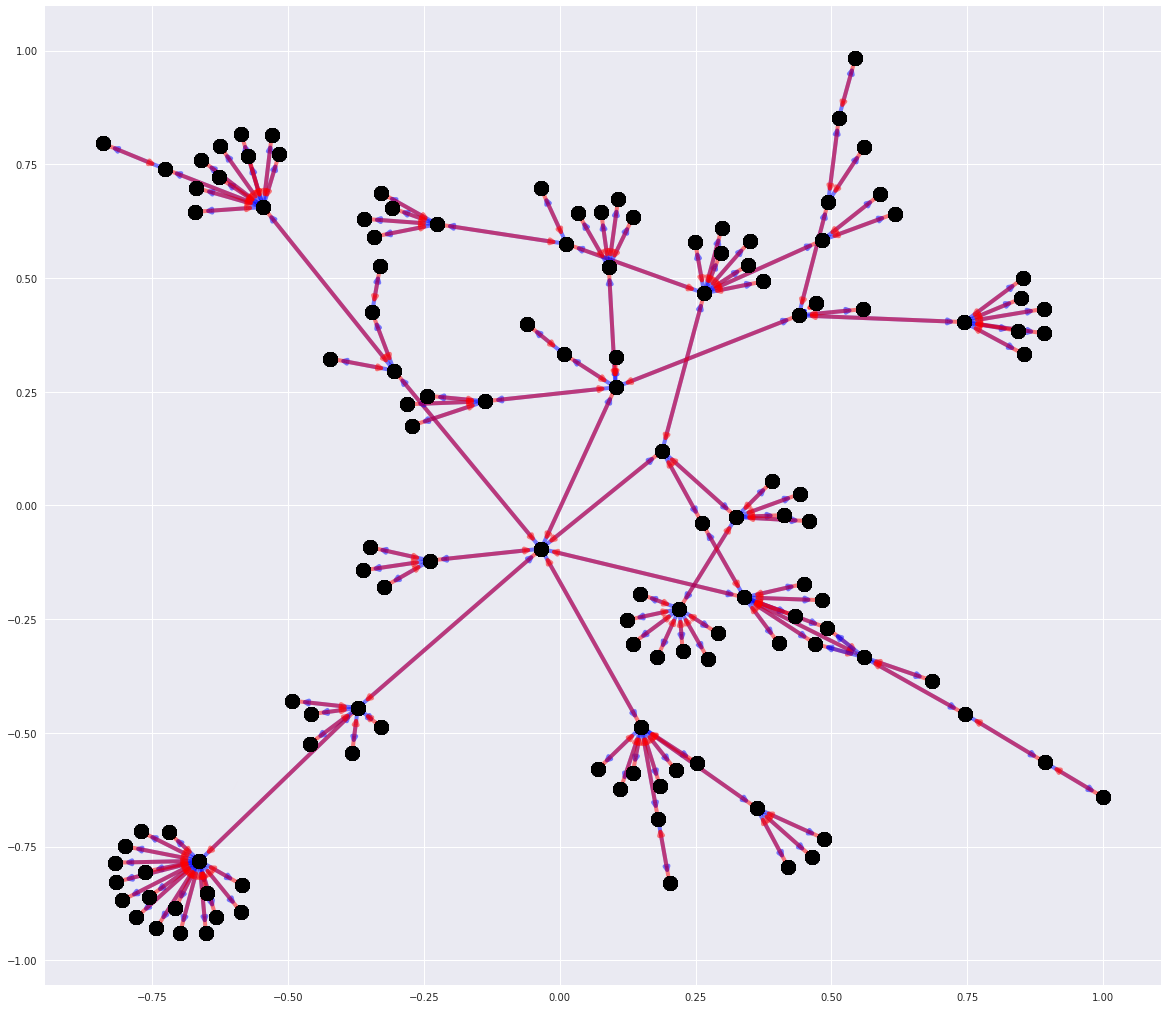

In [105]:
plt.figure(figsize = [20,18])
pos = nx.spring_layout(DG)

for node in DG.nodes():
    nx.draw_networkx_nodes(DG,pos,
                       node_color='black',
                       node_size=200,
                       alpha=0.4)
    
for edge in DG.edges():
    lx = list(edge)
    
    if DG.edges[lx]['relation']=="child":
        
        nx.draw_networkx_edges(DG,pos,
                       edgelist=[edge],
                       width=4, alpha=0.5, edge_color='b')
        
    elif DG.edges[lx]['relation']=="parent":
        
        nx.draw_networkx_edges(DG,pos,
                       edgelist=[edge],
                       width=4, alpha=0.5, edge_color='r')
        
    
plt.show()

-----------

In [133]:
for x in DG.edges:
    lx = list(x)
    print(DG.edges[lx]['relation'])

child
child
child
child
child
child
child
child
child
child
child
child
child
child
child
child
child
child
parent
child
child
child
child
child
child
parent
parent
parent
parent
parent
parent
parent
parent
parent
parent
parent
parent
parent
parent
parent
parent
parent
parent
child
child
child
child
child
child
parent
parent
parent
parent
parent
parent
child
child
child
child
child
child
child
child
parent
child
child
child
parent
child
child
child
child
child
parent
child
child
child
child
child
child
child
child
parent
child
child
child
parent
child
child
child
parent
parent
parent
parent
parent
parent
parent
child
child
child
parent
child
parent
parent
parent
parent
parent
child
child
child
child
child
child
child
child
parent
child
child
child
child
child
parent
parent
parent
parent
parent
parent
child
child
parent
parent
parent
child
child
parent
parent
parent
parent
child
child
child
child
parent
parent
parent
parent
parent
parent
parent
parent
parent
child
child
child
child
chil

### Analysis

In [126]:
list(G.edges)[0:10]

[('1639304259', '384984571'),
 ('1639304259', '533054712'),
 ('1639304259', '237197715'),
 ('1639304259', '106304476'),
 ('1639304259', '157326074'),
 ('1639304259', '1569145337'),
 ('1639304259', '602989108'),
 ('1639304259', '1803768976'),
 ('1639304259', '489508344'),
 ('1639304259', '1223380074')]

In [127]:
list(G.nodes.data())[0]

('1639304259',
 {'defn': 'Diseases of the skin incorporate conditions affecting the epidermis, its appendages (hair, hair follicle, sebaceous glands, apocrine sweat gland apparatus, eccrine sweat gland apparatus and nails) and associated mucous membranes (conjunctival, oral and genital), the dermis, the cutaneous vasculature and the subcutaneous tissue (subcutis).',
  'title': 'Diseases of the skin'})

In [131]:
print("Betweenness")
b = nx.betweenness_centrality(G)
for v in G.nodes():
    print(v, b[v])

Betweenness
1639304259 0.14266185684450353
384984571 0.587393202961838
533054712 0.0
237197715 0.0
106304476 0.0
157326074 0.0
1569145337 0.0
602989108 0.0
1803768976 0.0
489508344 0.0
1223380074 0.0
1397253045 0.0
1173690756 0.0
1365615047 0.0
141396655 0.0
1336446723 0.0
446523949 0.0
610583617 0.0
171514890 0.0
1780076091 0.6510347446364154
435641775 0.5358648186823619
30770553 0.0
160850170 0.0
1037862434 0.0
1378791709 0.0
467632481 0.10157584962977027
1072978670 0.239775963546611
772982663 0.20964495917979875
556027555 0.0963356749572812
951556487 0.025973039681032848
1276823930 0.12390355040820202
1275065853 0.0
160886685 0.0
1205745537 0.0
444002285 0.0
1404858629 0.0
111540068 0.0
82201615 0.025973039681032848
1604170617 0.008695652173913044
1527981498 0.0
1665769364 0.0
1103777271 0.0
223116614 0.0
1897656051 0.13366242642870704
18206903 0.10077843174482629
1883970802 0.007062844123789634
1518322360 0.0
1720001875 0.0
1086416908 0.0
549327141 0.01735333206759066
1361573217 0.

In [49]:
print("Degree centrality")
d = nx.degree_centrality(G)
for v in G.nodes():
    print((v, d[v]))


Degree centrality
('1639304259', 0.140625)
('384984571', 0.0546875)
('533054712', 0.0078125)
('237197715', 0.0078125)
('106304476', 0.0078125)
('157326074', 0.0078125)
('1569145337', 0.0078125)
('602989108', 0.0078125)
('1803768976', 0.0078125)
('489508344', 0.0078125)
('1223380074', 0.0078125)
('1397253045', 0.0078125)
('1173690756', 0.0078125)
('1365615047', 0.0078125)
('141396655', 0.0078125)
('1336446723', 0.0078125)
('446523949', 0.0078125)
('610583617', 0.0078125)
('171514890', 0.0078125)
('1780076091', 0.0546875)
('435641775', 0.0078125)
('30770553', 0.0078125)
('160850170', 0.0078125)
('1037862434', 0.0078125)
('1378791709', 0.0078125)
('467632481', 0.0703125)
('1072978670', 0.03125)
('772982663', 0.046875)
('556027555', 0.0703125)
('951556487', 0.03125)
('1276823930', 0.03125)
('1275065853', 0.0078125)
('160886685', 0.0078125)
('1205745537', 0.0078125)
('444002285', 0.0078125)
('1404858629', 0.0078125)
('111540068', 0.0078125)
('82201615', 0.03125)
('1604170617', 0.015625)
('1

In [50]:
print("Closeness centrality")
c = nx.closeness_centrality(G)
for v in G.nodes():
    print((v, c[v]))

Closeness centrality
('1639304259', 0.23616236162361623)
('384984571', 0.28507795100222716)
('533054712', 0.19133034379671152)
('237197715', 0.19133034379671152)
('106304476', 0.19133034379671152)
('157326074', 0.19133034379671152)
('1569145337', 0.19133034379671152)
('602989108', 0.19133034379671152)
('1803768976', 0.19133034379671152)
('489508344', 0.19133034379671152)
('1223380074', 0.19133034379671152)
('1397253045', 0.19133034379671152)
('1173690756', 0.19133034379671152)
('1365615047', 0.19133034379671152)
('141396655', 0.19133034379671152)
('1336446723', 0.19133034379671152)
('446523949', 0.19133034379671152)
('610583617', 0.19133034379671152)
('171514890', 0.19133034379671152)
('1780076091', 0.34782608695652173)
('435641775', 0.2222222222222222)
('30770553', 0.2222222222222222)
('160850170', 0.2222222222222222)
('1037862434', 0.2222222222222222)
('1378791709', 0.2222222222222222)
('467632481', 0.27176220806794055)
('1072978670', 0.2956120092378753)
('772982663', 0.2889390519187